In [17]:
import pandas as pd
import numpy as np
from names import util
from names import ngram
from names import bpe
import names
from scipy.cluster.hierarchy import dendrogram
import country_converter as coco
from string import ascii_lowercase
from sklearn.cluster import AgglomerativeClustering

# from iso639 import Lang

import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

In [18]:
tokenizer = bpe.deserialize_fast_tokenizer(f'full',None)
data = util.just_give_me_all_the_shit("firstName")

In [23]:
vocab_size = 6566
labels = []
x = []
for country in data.country.unique():
    tokens=tokenizer(list(data[data["country"]==country]["name"]))
    tokens = tokens["input_ids"]
    vector = [0]*vocab_size
    for name in tokens:
        for token in name:
            vector[token] += 1
    max_ = max(vector)
    vector = [val/max_ for val in vector]
    labels.append(country)
    x.append(vector)

In [20]:
# import os
# from pathlib import Path
# root = Path(names.__file__).parents[2]
# data = util.just_give_me_all_the_shit("firstName")
# countries = [p.stem for p in root.glob('data/*')]
# names_df = data.drop(["freq","freq_percent","normed_count","family","tfidf"],axis=1)
# print("here1")
# all_names = names_df.rename_axis(columns='country').stack().reset_index(0, drop=True).sort_index()
# print("here2")
# countries_ngrams = ngram.get_countries_ngrams(all_names, 3)
# print("here3")
# flat_ngrams = countries_ngrams.apply(sum, start=[])
# print("here4")
# existing_ngrams = set(flat_ngrams.sum())
# print("here5")
# ngram_ratio = flat_ngrams.apply(pd.Series).stack().groupby('country').value_counts(normalize=True)
# print("here6")
# idx = pd.MultiIndex.from_product([countries, existing_ngrams], names=['country', 'gram'])
# print("here7")
# data = ngram_ratio.reindex(idx).fillna(0).unstack()
# print("here8")
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
model = model.fit(x)

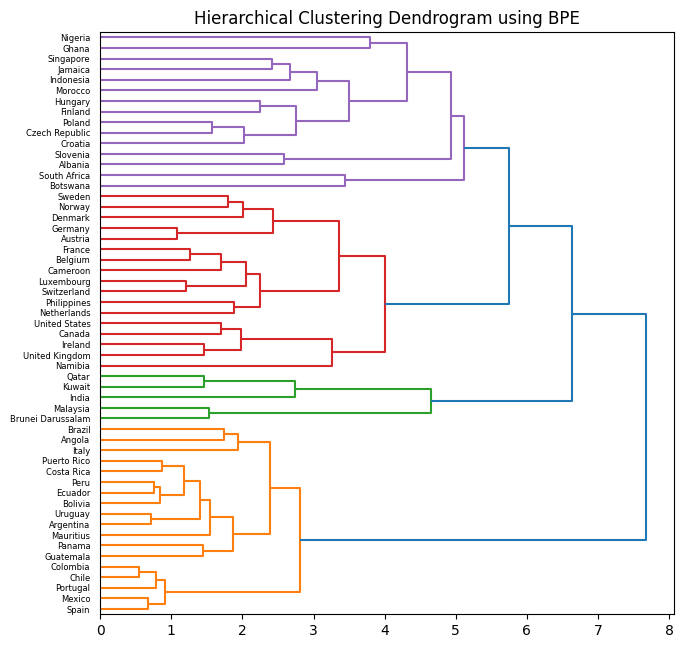

In [21]:
# data, model = ngram.get_kmeans_countries(k=3)
plt.title("Hierarchical Clustering Dendrogram using BPE")
# labels=data.index.values.tolist()
labels = coco.convert(names=labels, to='name_short')
ngram.plot_dendrogram(model, truncate_mode=None, p=10,labels=labels, orientation='right')
N=len(labels)
plt.gca().margins(y=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_yticklabels()
maxsize = max([t.get_window_extent().height for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[1]

plt.gcf().subplots_adjust(bottom=margin, top=1.-margin)
plt.gcf().set_size_inches(plt.gcf().get_size_inches()[0]+1,s+1)
plt.show()

In [20]:
labels

['United Arab Emirates',
 'Afghanistan',
 'Albania',
 'Angola',
 'Argentina',
 'Austria',
 'Azerbaijan',
 'Bangladesh',
 'Belgium',
 'Burkina Faso',
 'Bulgaria',
 'Bahrain',
 'Burundi',
 'Brunei Darussalam',
 'Bolivia',
 'Brazil',
 'Botswana',
 'Canada',
 'Switzerland',
 'Chile',
 'Cameroon',
 'China',
 'Colombia',
 'Costa Rica',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Denmark',
 'Algeria',
 'Ecuador',
 'Estonia',
 'Egypt',
 'Spain',
 'Ethiopia',
 'Finland',
 'Fiji',
 'France',
 'United Kingdom',
 'Georgia',
 'Ghana',
 'Greece',
 'Guatemala',
 'Hong Kong',
 'Honduras',
 'Croatia',
 'Haiti',
 'Hungary',
 'Indonesia',
 'Ireland',
 'Israel',
 'India',
 'Iraq',
 'Iran',
 'Iceland',
 'Italy',
 'Jamaica',
 'Jordan',
 'Japan',
 'Cambodia',
 'South Korea',
 'Kuwait',
 'Kazakhstan',
 'Lebanon',
 'Lithuania',
 'Luxembourg',
 'Libya',
 'Morocco',
 'Moldova',
 'Macau',
 'Malta',
 'Mauritius',
 'Maldives',
 'Mexico',
 'Malaysia',
 'Namibia',
 'Nigeria',
 'Netherlands',
 'Norway',
 

In [19]:
Lang("French")

Lang(name='French', pt1='fr', pt2b='fre', pt2t='fra', pt3='fra', pt5='')

In [18]:
Lang("Arabic")

Lang(name='Arabic', pt1='ar', pt2b='ara', pt2t='ara', pt3='ara', pt5='')

In [21]:
len(labels)

105

In [28]:
labels[-35:]

['Malta',
 'Mauritius',
 'Maldives',
 'Mexico',
 'Malaysia',
 'Namibia',
 'Nigeria',
 'Netherlands',
 'Norway',
 'Oman',
 'Panama',
 'Peru',
 'Philippines',
 'Poland',
 'Puerto Rico',
 'Palestine',
 'Portugal',
 'Qatar',
 'Serbia',
 'Russia',
 'Saudi Arabia',
 'Sudan',
 'Sweden',
 'Singapore',
 'Slovenia',
 'El Salvador',
 'Syria',
 'Turkmenistan',
 'Tunisia',
 'Türkiye',
 'Taiwan',
 'United States',
 'Uruguay',
 'Yemen',
 'South Africa']

In [7]:
country_dict = {
    'Malta': ["Afroasiatic languages","Semitic languages"],
    'Maldives':["Indo-European languages","Indo-Iranian languages"],
    'Mexico':["Indo-European languages","Romance languages"],
     'Malaysia':["Austronesian languages","Malayo-Polynesian languages"],
     'Namibia':["Niger-Congo languages","Bantu languages"],
     'Netherlands':["Indo-European languages","Germanic languages"],
     'Norway':["Indo-European languages","Germanic languages"],
     'Oman':["Afroasiatic languages","Semitic languages"],
     'Panama':["Indo-European languages","Romance languages"],
     'Peru':["Indo-European languages","Romance languages"],
     'Philippines':["Austronesian languages","Philippine languages"],
     'Poland':["Indo-European languages","Slavic languages"],
     'Puerto Rico':["Indo-European languages","Romance languages"],
     'Palestine':["Afroasiatic languages","Semitic languages"],
     'Portugal':["Indo-European languages","Romance languages"],
     'Qatar':["Afroasiatic languages","Semitic languages"],
     'Serbia':["Afroasiatic languages","Semitic languages"],
     'Russia':["Afroasiatic languages","Semitic languages"],
     'Saudi Arabia':["Afroasiatic languages","Semitic languages"],
     'Sudan':["Afroasiatic languages","Semitic languages"],
     'Sweden':["Indo-European languages","Germanic languages"],
     # 'Singapore':["Indo-European languages","Germanic languages"],
     'Slovenia':["Indo-European languages","Slavic languages"],
     'El Salvador':["Indo-European languages","Romance languages"],
     'Syria':["Afroasiatic languages","Semitic languages"],
     'Turkmenistan':["Turkic languages","Turkic languages"],
     'Tunisia':["Afroasiatic languages","Semitic languages"],
     'Türkiye':["Turkic languages","Turkic languages"],
     'Taiwan':["Sino-Tibetan languages","Sinitic (Chinese) languages"],
     'United States':["Indo-European languages","Germanic languages"],
     'Uruguay':["Indo-European languages","Romance languages"],
     'Yemen':["Afroasiatic languages","Semitic languages"],
     'United Arab Emirates': ["Afroasiatic languages","Semitic languages"],
    'Afghanistan': ['Indo-European languages', 'Indo-Iranian languages'],
    'Albania': ['Indo-European languages', 'Albanian languages'],
    'Angola': ["Indo-European languages","Romance languages"],
    'Argentina': ['Indo-European languages', 'Romance languages'],
    'Austria': ['Indo-European languages', 'Germanic languages'],
    'Azerbaijan': ['Turkic languages', 'Turkic languages'],
    'Bangladesh': ['Indo-European languages', 'Indo-Iranian languages'],
    'Belgium': ['Indo-European languages', 'Germanic languages'],
    'Burkina Faso': ['Niger-Congo languages', 'Gur languages'],
    'Bulgaria': ['Indo-European languages', 'Slavic languages'],
    'Bahrain': ['Afroasiatic languages', 'Semitic languages'],
    'Burundi': ['Niger-Congo languages', 'Bantu languages'],
    'Brunei Darussalam': ['Austronesian languages', 'Malayo-Polynesian languages'],
    'Bolivia': ['Indo-European languages', 'Romance languages'],
    'Brazil': ['Indo-European languages', 'Romance languages'],
    'Botswana': ['Khoe languages', 'Khoe languages'],
    'Canada': ['Indo-European languages', 'Germanic languages'],
    'Switzerland': ['Indo-European languages', 'Germanic languages'],
    'Chile': ['Indo-European languages', 'Romance languages'],
    # 'Cameroon': ['Indo-European languages', 'Romance languages'],
    'China': ["Sino-Tibetan languages","Sinitic (Chinese) languages"],
    'Colombia': ['Indo-European languages', 'Romance languages'],
    'Costa Rica': ['Indo-European languages', 'Romance languages'],
    'Cyprus': ["Indo-European languages","Hellenic languages"],
    'Czech Republic': ["Indo-European languages","Slavic languages"],
    'Germany': ['Indo-European languages', 'Germanic languages'],
    'Djibouti': ["Afroasiatic languages","Cushitic languages"],
    'Denmark': ['Indo-European languages', 'Germanic languages'],
    'Algeria': ['Afroasiatic languages', 'Semitic languages'],
    'Ecuador': ['Indo-European languages', 'Romance languages'],
    'Estonia': ["Uralic languages","Finnic languages"],
    'Egypt': ['Afroasiatic languages', 'Semitic languages'],
    'Spain': ['Indo-European languages', 'Romance languages'],
    "Libya":['Afroasiatic languages', 'Semitic languages'],
    "Morocoo":['Afroasiatic languages', 'Semitic languages'],
    "Moldova":['Indo-European languages', 'Romance languages'],
    "Macau":["Sino-Tibetan languages","Sinitic (Chinese) languages"],
    
}
country_dict['Finland'] = ['Uralic languages', 'Finnic Languages']
country_dict['France'] = ['Indo-European languages', 'Romance languages']
country_dict['United Kingdom'] = ['Indo-European languages', 'Germanic languages']
country_dict['Georgia'] = ['Caucasian languages', 'South Caucasian / Kartvelian languages']
country_dict['Greece'] = ['Indo-European languages', 'Hellenic languages']
country_dict['Guatemala'] = ['Indo-European languages', 'Romance languages']
country_dict['Hong Kong'] = ['Sino-Tibetan languages', 'Sinitic (Chinese) languages']
country_dict['Honduras'] = ['Indo-European languages', 'Romance languages']
country_dict['Croatia'] = ['Indo-European languages', 'Slavic languages']
country_dict['Hungary'] = ['Uralic languages', 'Ugric languages']
country_dict['Austronesian languages'] = ['Indo-European languages', 'Malayo-Polynesian languages']
country_dict['Ireland'] = ['Indo-European languages', 'Germanic languages']
country_dict['Israel'] = ['Indo-European languages', 'Semitic languages']
country_dict['Iraq'] = ['Afroasiatic languages', 'Semitic languages']
country_dict['Iran'] = ['Indo-European languages', 'Indo-Iranian languages']
country_dict['Italy'] = ['Indo-European languages', 'Romance languages']
# country_dict['Jamaica'] = ['Indo-European languages', 'Germanic languages']
country_dict['Jordan'] = ['Afroasiatic languages', 'Semitic languages']
country_dict['Japan'] = ['Japonic / Japanese-Ryukyuan languages', 'Japonic / Japanese-Ryukyuan languages']
country_dict['Cambodia'] = ['Austroasiatic languages', 'Khmeric languages']
country_dict['South Korea'] = ['Koreanic languages', 'Koreanic languages']
country_dict['Kuwait'] = ['Afroasiatic languages', 'Semitic languages']
country_dict['Kazakhstan'] = ['Turkic languagess', 'Turkic languages']
country_dict['Lebanon'] = ['Afroasiatic languages', 'Semitic languages']
country_dict['Lithuania'] = ['Indo-European languages', 'Baltic languages']
country_dict['Luxembourg'] = ['Indo-European languages', 'Germanic languages']

In [8]:
for key, value in country_dict.items():
    if "Germanic languages" in value:
        print(key)
print("----")
for key, value in country_dict.items():
    if "Romance languages" in value:
        print(key)

Netherlands
Norway
Sweden
United States
Austria
Belgium
Canada
Switzerland
Germany
Denmark
United Kingdom
Ireland
Luxembourg
----
Mexico
Panama
Peru
Puerto Rico
Portugal
El Salvador
Uruguay
Angola
Argentina
Bolivia
Brazil
Chile
Cameroon
Colombia
Costa Rica
Ecuador
Spain
Moldova
France
Guatemala
Honduras
Italy


In [9]:
for key, value in country_dict.items():
    if "Germanic languages" not in value and "Romance languages" not in value:
        print(key)

Malta
Maldives
Malaysia
Namibia
Oman
Philippines
Poland
Palestine
Qatar
Serbia
Russia
Saudi Arabia
Sudan
Slovenia
Syria
Turkmenistan
Tunisia
Türkiye
Taiwan
Yemen
United Arab Emirates
Afghanistan
Albania
Azerbaijan
Bangladesh
Burkina Faso
Bulgaria
Bahrain
Burundi
Brunei Darussalam
Botswana
China
Cyprus
Czech Republic
Djibouti
Algeria
Estonia
Egypt
Libya
Morocoo
Macau
Finland
Georgia
Greece
Hong Kong
Croatia
Hungary
Austronesian languages
Israel
Iraq
Iran
Jordan
Japan
Cambodia
South Korea
Kuwait
Kazakhstan
Lebanon
Lithuania


In [33]:
len(country_dict.keys())

96

In [34]:
len(labels)

105

In [35]:
#https://omniglot.com/writing/langfam.htm

In [ ]:
#Eberhard, David M., Gary F. Simons, and Charles D. Fennig (eds.). 2022. Ethnologue: Languages of the World. Twenty-fifth edition. Dallas, Texas: SIL International